In [1]:
from tensorflow import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas  as pd
import cv2 
import numpy as np
import os
import json
from sklearn.model_selection import train_test_split

In [2]:
def json_loader(file_path):
    with open(file_path) as f:
        data = json.load(f)
        for i in data['shapes']:
            temp=i['points']
            return sum(temp,[])

In [3]:
root_directory="C:\\Users\\rudra\\Downloads\\Object_Detection"
out_dir="C:\\Users\\rudra\\Downloads\\output"

data=[]

for image_file in os.listdir(root_directory):
    if image_file.endswith(".jpg" or ".png"):  
        file_path = os.path.join(root_directory, image_file)
        img_name=image_file.split('.')[0]
        img_name=img_name+'.json'
        path=os.path.join(out_dir,img_name)
        data.append((file_path,json_loader(path)))
data
df = pd.DataFrame(data, columns=["file_path","rectangle's_coordinates"])
df

,file_path,rectangle's_coordinates
0,C:\Users\rudra\Downloads\Object_Detection\0-wi...,"[227.96610169491527, 17.584745762711865, 381.7..."
1,C:\Users\rudra\Downloads\Object_Detection\0.jpg,"[34.60784313725489, 10.653594771241837, 125.78..."
2,C:\Users\rudra\Downloads\Object_Detection\1-wi...,"[167.79661016949154, 15.889830508474578, 417.7..."
3,C:\Users\rudra\Downloads\Object_Detection\10-w...,"[52.72881355932205, 57.83898305084746, 177.305..."
4,C:\Users\rudra\Downloads\Object_Detection\100-...,"[44.71502590673572, 44.31088082901554, 277.875..."
...,...,...
1502,C:\Users\rudra\Downloads\Object_Detection\with...,"[293.40495867768595, 129.84297520661158, 395.0..."
1503,C:\Users\rudra\Downloads\Object_Detection\with...,"[219.4186046511628, 59.65116279069769, 406.627..."
1504,C:\Users\rudra\Downloads\Object_Detection\with...,"[196.1627906976745, 127.09302325581397, 449.65..."
1505,C:\Users\rudra\Downloads\Object_Detection\with...,"[412.58064516129025, 228.11290322580643, 469.3..."


In [4]:
import time

start = time.time()

df["images"] = df["file_path"].apply(
    lambda path: cv2.resize(cv2.imread(path), (128, 128))
)

end = time.time()

total = end - start
total

12.93701434135437

In [5]:
df["rectangle's_coordinates"]=df["rectangle's_coordinates"].apply(lambda x:list(map(int, x)))
df

,file_path,rectangle's_coordinates,images
0,C:\Users\rudra\Downloads\Object_Detection\0-wi...,"[227, 17, 381, 210]","[[[32, 59, 51], [34, 56, 46], [41, 57, 55], [4..."
1,C:\Users\rudra\Downloads\Object_Detection\0.jpg,"[34, 10, 125, 111]","[[[20, 5, 9], [20, 5, 9], [20, 6, 10], [21, 6,..."
2,C:\Users\rudra\Downloads\Object_Detection\1-wi...,"[167, 15, 417, 262]","[[[248, 250, 250], [248, 250, 250], [249, 251,..."
3,C:\Users\rudra\Downloads\Object_Detection\10-w...,"[52, 57, 177, 172]","[[[223, 224, 222], [224, 225, 223], [226, 227,..."
4,C:\Users\rudra\Downloads\Object_Detection\100-...,"[44, 44, 277, 341]","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...
1502,C:\Users\rudra\Downloads\Object_Detection\with...,"[293, 129, 395, 238]","[[[170, 179, 182], [171, 180, 183], [167, 177,..."
1503,C:\Users\rudra\Downloads\Object_Detection\with...,"[219, 59, 406, 320]","[[[197, 198, 196], [197, 198, 196], [199, 200,..."
1504,C:\Users\rudra\Downloads\Object_Detection\with...,"[196, 127, 449, 378]","[[[206, 194, 184], [206, 194, 184], [206, 194,..."
1505,C:\Users\rudra\Downloads\Object_Detection\with...,"[412, 228, 469, 290]","[[[179, 156, 160], [158, 135, 139], [160, 135,..."


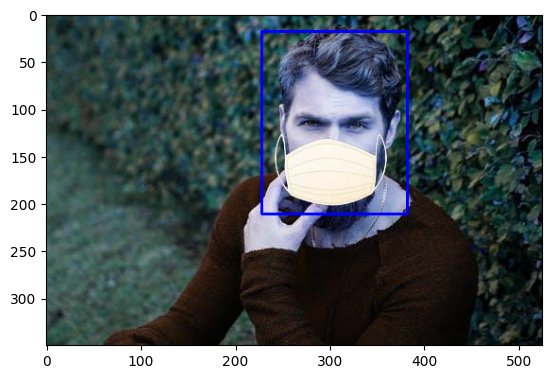

In [6]:
import cv2

image = cv2.imread(df["file_path"][0])
start_point = (228, 18) 
end_point = (382, 211)
color = (0, 0, 255)
thickness = 2
cv2.rectangle(image, start_point, end_point, color, thickness)

plt.imshow(image)

In [7]:
# def process_images(paths):
#     batch_images = []
#     for path in paths:
#         img = cv2.imread(path)
#         gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#         gray_image_3ch = np.stack((gray_image,) * 3, axis=-1)
#         img = cv2.resize(gray_image_3ch, (128, 128))
#         img = img.astype(np.float32)/255 
#         batch_images.append(img)
#     return np.array(batch_images)


# batch_size = 60

# num_images = len(df["file_path"])
# processed_images = []


# for i in range(0, num_images, batch_size):
#     batch_paths = df["file_path"][i : i + batch_size].tolist()
#     batch_img_processed = process_images(batch_paths)
#     processed_images.append(batch_img_processed)

# X = np.concatenate(processed_images, axis=0)
# X.shape

In [8]:
X = np.stack(np.array(df['images']), axis=0)/255
X.shape

(1507, 128, 128, 3)

In [9]:
y=np.stack(np.array(df['rectangle\'s_coordinates']), axis=0)/128
y.shape

(1507, 4)

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=48)

In [11]:
model=keras.Sequential([
        keras.layers.Conv2D(16,3,activation="relu",input_shape=( 128, 128, 3),),
        keras.layers.MaxPool2D(2, 2),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(32,3,activation="relu",),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Dropout(0.2),
        keras.layers.Conv2D(64,3,activation="relu",),
        keras.layers.MaxPool2D(2, 2),
        keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(4, activation="softmax"),
])
model.compile(loss='mse',optimizer='adam',metrics=["accuracy"])

In [12]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
40/40 [==============================] - 10s 210ms/step - loss: 8.7152 - accuracy: 0.4758
Epoch 2/20
40/40 [==============================] - 9s 221ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 3/20
40/40 [==============================] - 9s 226ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 4/20
40/40 [==============================] - 15s 379ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 5/20
40/40 [==============================] - 14s 340ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 6/20
40/40 [==============================] - 14s 347ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 7/20
40/40 [==============================] - 14s 350ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 8/20
40/40 [==============================] - 15s 374ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 9/20
40/40 [==============================] - 14s 352ms/step - loss: 8.7017 - accuracy: 0.4742
Epoch 10/20
40/40 [==============================] - 14s 353ms/step - loss: 8.7017 - accuracy

In [13]:
model.evaluate(X_test,y_test)

8/8 [==============================] - 1s 77ms/step - loss: 10.3673 - accuracy: 0.8634


[10.367268562316895, 0.8634361028671265]

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

In [15]:
model.get_weights()

[array([[[[-3.38041596e-02, -1.14268869e-01, -1.68886423e-01,
           -1.69534177e-01,  1.42354771e-01, -1.26148909e-01,
           -8.00379068e-02, -3.26465443e-02, -9.61826891e-02,
           -1.24042727e-01,  5.60116097e-02, -4.91491295e-02,
           -1.27424851e-01, -4.23041396e-02, -1.92542255e-01,
            4.41860333e-02],
          [-3.80394631e-03,  1.95583522e-01, -1.20125934e-01,
            1.15328498e-01, -5.86940296e-05,  1.48975864e-01,
           -1.30851135e-01, -6.96400255e-02, -1.50652394e-01,
           -8.37584119e-03,  8.26304406e-03,  2.37092730e-02,
            5.87779358e-02, -4.20556851e-02, -4.37950008e-02,
            9.71568078e-02],
          [-9.83047411e-02, -1.76069569e-02, -1.98993027e-01,
            1.63226917e-01,  3.37351449e-02, -1.04074329e-01,
            9.38663706e-02,  1.06390573e-01, -9.73300561e-02,
           -9.28344503e-02, -5.17860018e-02, -9.75343734e-02,
            1.26609147e-01, -7.01664090e-02, -3.85375973e-03,
            

In [16]:
def predict_rectangle(file_path):
    img = cv2.imread(file_path)
    img=cv2.resize(img,(128,128))
    image= np.stack(np.array(img), axis=0)/255
    image=np.reshape(image,(1,128,128,3))
    print(image.shape)
    out=model.predict(image)
    out=out*128
    cv2.rectangle(img,(int(out[0][0]),int(out[0][1])),((int(out[0][0]+out[0][2])),(int(out[0][1]+out[0][3]))),color=(0,0,255))
    plt.imshow(img)

(1, 128, 128, 3)
1/1 [==============================] - 0s 387ms/step


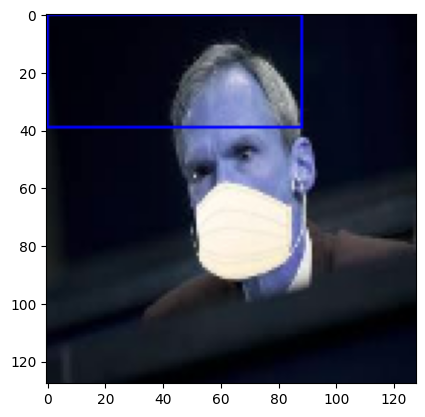

In [17]:
predict_rectangle(df["file_path"][65])